# Import Isomarker

In [8]:
from isomarker.isomarker import *

# Run "pip install isomarker" if not installed already

# Read Sample Data

In [10]:
raw_data_file_path = 'Sample_Raw_Count.csv' #Sample X Feature Raw Read Count CSV
norm_data_file_path = 'Sample_VSTNorm_Count.csv' #Sample X Feature Normalized Read Count CSV
metadata_file_path = 'Sample_Metadata.csv' #Sample X Observations Metadata CSV

In [11]:
adata = prep_anndata(raw_data_file_path, metadata_file_path, norm_data_file_path)

# Pseudobulk RNA-seq Sample Dataset as an AnnData object is used for input to IsoMarker
# Sample (row - obs) X Gene (column - var)
# Raw counts in adata.X

In [12]:
adata

AnnData object with n_obs × n_vars = 218 × 1393
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'custombatch', 'Lineage', 'nCells', 'patientID', 'Sample', 'Study', 'Diagnosis', 'Timepoint', 'AgeGroup'
    layers: 'vst'

In [13]:
adata.obs

# Anndata.obs contains the study batch ("Study") and the group ("Lineage) 

,orig.ident,nCount_RNA,nFeature_RNA,custombatch,Lineage,nCells,patientID,Sample,Study,Diagnosis,Timepoint,AgeGroup
AML_Lasry2022_adult_AML0024__Monocyte,AML,4.332936e+07,21408,AML_Lasry2022_adult_AML0024,Monocyte,5319,Lasry_2022__adult_AML0024,adult_AML0024,Lasry_2022,AML,Diagnosis,Adult
AML_Lasry2022_adult_AML0024__ProMono,AML,6.089418e+06,17408,AML_Lasry2022_adult_AML0024,ProMono,499,Lasry_2022__adult_AML0024,adult_AML0024,Lasry_2022,AML,Diagnosis,Adult
AML_Lasry2022_adult_AML0048__GMP,AML,3.590367e+05,11210,AML_Lasry2022_adult_AML0048,GMP,69,Lasry_2022__adult_AML0048,adult_AML0048,Lasry_2022,AML,Diagnosis,Adult
AML_Lasry2022_adult_AML0048__HSC_MPP,AML,4.302383e+05,11677,AML_Lasry2022_adult_AML0048,HSC_MPP,86,Lasry_2022__adult_AML0048,adult_AML0048,Lasry_2022,AML,Diagnosis,Adult
AML_Lasry2022_adult_AML0048__Late_Erythroid,AML,3.928176e+05,10782,AML_Lasry2022_adult_AML0048,Late_Erythroid,91,Lasry_2022__adult_AML0048,adult_AML0048,Lasry_2022,AML,Diagnosis,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
AML_pvg2019_AML921A__GMP,AML,1.965651e+06,15765,AML_pvg2019_AML921A,GMP,463,vanGalen_2019__AML921,AML921A-D0,vanGalen_2019,AML,Diagnosis,Adult
AML_pvg2019_AML921A__HSC_MPP,AML,2.737210e+05,12170,AML_pvg2019_AML921A,HSC_MPP,118,vanGalen_2019__AML921,AML921A-D0,vanGalen_2019,AML,Diagnosis,Adult
AML_pvg2019_AML921A__LMPP,AML,3.607940e+05,12719,AML_pvg2019_AML921A,LMPP,124,vanGalen_2019__AML921,AML921A-D0,vanGalen_2019,AML,Diagnosis,Adult
AML_pvg2019_AML921A__Monocyte,AML,1.582689e+06,15903,AML_pvg2019_AML921A,Monocyte,666,vanGalen_2019__AML921,AML921A-D0,vanGalen_2019,AML,Diagnosis,Adult


# Objective: Identify Cell-State Markers for each group in Lineage

# Visualization: Cell State Dimensionality-Reduced Plots

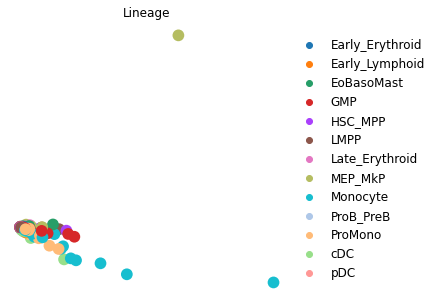

In [20]:
pca_plot_lineage(adata=adata, lineage='Lineage')

/opt/anaconda3/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


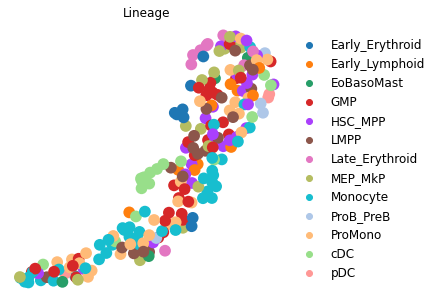

In [22]:
umap_plot_lineage(adata=adata, lineage='Lineage')

Found 47 genes with zero variance.


/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: invalid value encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


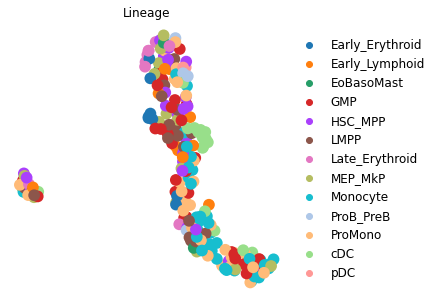

In [23]:
# Optional: Batch Correction with COMBAT
umap_plot_lineage(adata=adata, lineage='Lineage', batch='Study')

# Visualization: Gene Expression

/opt/anaconda3/lib/python3.12/site-packages/isomarker/isomarker.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([x.replace("_", "-") for x in order], size=15, ha='right')


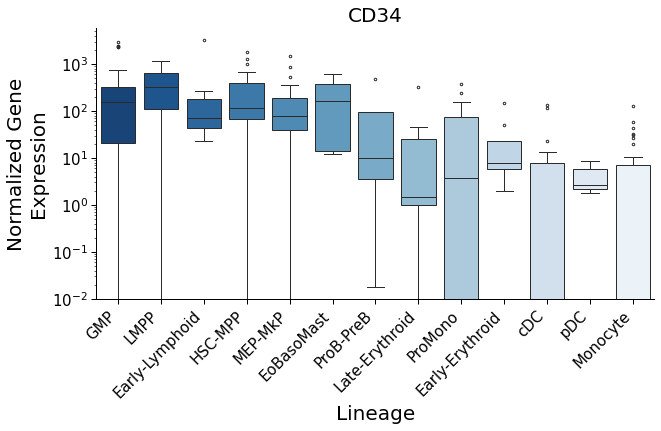

In [25]:
lineage_gex(adata = adata, gene='CD34', lineage='Lineage', log=True)

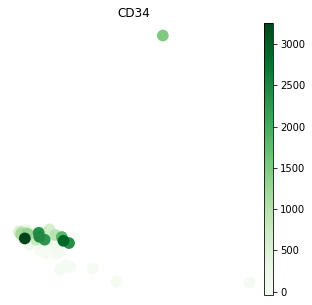

In [28]:
pca_plot_marker(adata=adata, marker='CD34')

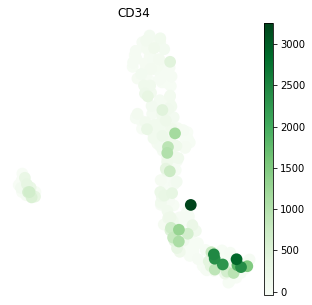

In [29]:
umap_plot_marker(adata=adata, marker='CD34')

Found 47 genes with zero variance.


/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: invalid value encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_combat.py:351: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


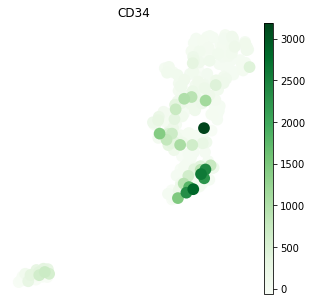

In [33]:
# Optional: Batch Correction with COMBAT
umap_plot_marker(adata=adata, marker='CD34', batch='Study')

# Analysis: Differential Expression

### Identify Markers using DESeq2 for the HSC-MPP Cell State

In [27]:
HSCMPP_dge_markers = pydeseq2_1_vs_rest(adata, cluster_label='Lineage', reference='HSC_MPP', design_factors=['Lineage', 'Study'])

#Study is one of the batch variables to control for

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.35 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.36 seconds.

Fitting LFCs...
... done in 0.48 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 145 outlier genes.

Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.12 seconds.

Running Wald tests...
... done in 0.28 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs HSC-MPP
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460        0.183483  0.402741  0.455587  0.648687  0.763703
ABCA12      0.069336       -0.964656  1.773609 -0.543895  0.586514       NaN
ABCA7      22.778049        1.510703  0.341111  4.428777  0.000009  0.000114
ABCA8       0.159593       -1.189837  1.673608 -0.710941  0.477120       NaN
ABCB1       9.401515       -2.085990  0.632907 -3.295884  0.000981  0.005170
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.720322  4.595022 -0.156761  0.875433       NaN
XPNPEP2     0.084872       -0.535876  1.168321 -0.458672  0.646470       NaN
YBX1     1644.146756        0.391627  0.138642  2.824724  0.004732  0.019043
ZDHHC5     29.359482       -0.034822  0.142914 -0.243655  0.807498  0.873480
ZP4         0.014476       -0.681997  4.594784 -0.148429  0.882005       NaN

[1393 rows x

... done in 0.34 seconds.



In [29]:
HSCMPP_dge_markers

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ABCA1,24.093460,-0.126327,0.347340,0.455587,0.648687,0.763703
ABCA12,0.069336,0.239615,0.741147,-0.543895,0.586514,NaN
ABCA7,22.778049,-1.384356,0.358492,4.428777,0.000009,0.000114
ABCA8,0.159593,0.297005,0.724790,-0.710941,0.477120,NaN
ABCB1,9.401515,1.756349,0.614411,-3.295884,0.000981,0.005170
...,...,...,...,...,...,...
XCR1,0.002613,-0.011604,0.803971,-0.156761,0.875433,NaN
XPNPEP2,0.084872,-0.059742,0.677739,-0.458672,0.646470,NaN
YBX1,1644.146756,-0.341071,0.139261,2.824724,0.004732,0.019043
ZDHHC5,29.359482,0.032860,0.138828,-0.243655,0.807498,0.873480


### Identify Markers using DESeq2 for All Cell States

In [21]:
lfc_data = pydeseq2_1_vs_rest_wrapper(adata=adata, cluster_label='Lineage', design_factors=['Lineage', 'Study'])

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.34 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.33 seconds.

Fitting LFCs...
... done in 0.33 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 158 outlier genes.

Fitting dispersions...
... done in 0.13 seconds.

Fitting MAP dispersions...
... done in 0.12 seconds.

Fitting LFCs...
... done in 0.14 seconds.

Running Wald tests...
... done in 0.25 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs ProMono
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460        0.684447  0.377961  1.810896  7.015699e-02   
ABCA12      0.069336        0.949827  1.733921  0.547791  5.838352e-01   
ABCA7      22.778049        0.043144  0.310158  0.139104  8.893682e-01   
ABCA8       0.159593        1.419070  1.659292  0.855226  3.924260e-01   
ABCB1       9.401515        4.982119  0.696665  7.151387  8.590526e-13   
...              ...             ...       ...       ...           ...   
XCR1        0.002613        0.885812  4.398073  0.201409  8.403786e-01   
XPNPEP2     0.084872        0.466714  1.075291  0.434035  6.642633e-01   
YBX1     1644.146756        0.084723  0.133822  0.633102  5.266673e-01   
ZDHHC5     29.359482        0.028496  0.126458  0.225339  8.217156e-01   
ZP4         0.014476        0.489498  4.381183  0.111727  9.110395e-01   

                 padj  
ABCA1    1.649002e-01  


... done in 0.37 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage ProMono vs Other
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460       -0.540107  0.376392  1.810896  7.015699e-02   
ABCA12      0.069336       -0.125379  0.626565  0.547791  5.838352e-01   
ABCA7      22.778049       -0.037410  0.282000  0.139104  8.893682e-01   
ABCA8       0.159593       -0.158167  0.768889  0.855226  3.924260e-01   
ABCB1       9.401515       -5.405097  0.764419  7.151387  8.590526e-13   
...              ...             ...       ...       ...           ...   
XCR1        0.002613       -0.016792  0.823214  0.201409  8.403786e-01   
XPNPEP2     0.084872        0.066513  0.669104  0.434035  6.642633e-01   
YBX1     1644.146756       -0.088797  0.131978  0.633102  5.266673e-01   
ZDHHC5     29.359482       -0.026274  0.123545  0.225339  8.217156e-01   
ZP4         0.014476        0.023733  0.774818  0.111727  9.110395e-01   

                 padj  
ABCA1    1.649002

Fitting dispersions...
... done in 0.32 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.34 seconds.

Fitting LFCs...
... done in 0.32 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 156 outlier genes.

Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.11 seconds.

Running Wald tests...
... done in 0.22 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Early-Lymphoid
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -0.601747  0.603475 -0.997136  0.318698  0.494821
ABCA12      0.069336       -0.507992  2.758538 -0.184153  0.853894       NaN
ABCA7      22.778049        0.392431  0.508918  0.771109  0.440642  0.613731
ABCA8       0.110243       -0.035805  2.602630 -0.013757  0.989024       NaN
ABCB1       9.401515       -1.864855  0.984858 -1.893527  0.058288  0.178441
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.556903  6.990496 -0.079666  0.936503       NaN
XPNPEP2     0.084872       -0.476815  1.764955 -0.270157  0.787040       NaN
YBX1     1644.146756        0.613853  0.211206  2.906420  0.003656  0.032682
ZDHHC5     29.359482        0.063608  0.218149  0.291582  0.770606  0.848242
ZP4         0.014476       -0.629574  6.984638 -0.090137  0.928178       NaN

[1393

... done in 0.32 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage Early-Lymphoid vs Other
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460        0.308631  0.429780 -0.997136  0.318698  0.494821
ABCA12      0.069336       -0.003275  0.510856 -0.184153  0.853894       NaN
ABCA7      22.778049       -0.198529  0.394340  0.771109  0.440642  0.613731
ABCA8       0.110243        0.303345  0.638662 -0.013757  0.989024       NaN
ABCB1       9.401515        0.868263  0.797159 -1.893527  0.058288  0.178441
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.003100  0.628542 -0.079666  0.936503       NaN
XPNPEP2     0.084872        0.000069  0.549271 -0.270157  0.787040       NaN
YBX1     1644.146756       -0.179726  0.223571  2.906420  0.003656  0.032682
ZDHHC5     29.359482       -0.052346  0.200779  0.291582  0.770606  0.848242
ZP4         0.014476        0.003771  0.603405 -0.090137  0.928178       NaN

Fitting dispersions...
... done in 0.32 seconds.

Fitting dispersion trend curve...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.34 seconds.

Fitting LFCs...
... done in 0.32 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 161 outlier genes.

Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.12 seconds.

Fitting LFCs...
... done in 0.13 seconds.

Running Wald tests...
... done in 0.25 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs LMPP
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460        0.436308  0.431431  1.011303  0.311871  0.463745
ABCA12      0.069336       -0.130695  1.920317 -0.068059  0.945738       NaN
ABCA7      22.778049        1.215766  0.356077  3.414330  0.000639  0.005265
ABCA8       0.159593       -0.821361  1.797676 -0.456902  0.647742       NaN
ABCB1       9.401515       -1.474833  0.697702 -2.113843  0.034529  0.104689
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613        0.219086  4.963671  0.044138  0.964794       NaN
XPNPEP2     0.084872        0.521071  1.273361  0.409209  0.682386       NaN
YBX1     1644.146756        0.340646  0.150268  2.266930  0.023394  0.077150
ZDHHC5     29.359482        0.237402  0.147605  1.608369  0.107754  0.227789
ZP4         0.014476        0.255467  4.963544  0.051469  0.958952       NaN

[1393 rows x 6 

... done in 0.46 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage LMPP vs Other
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -0.286786  0.383947  1.011303  0.311871  0.463745
ABCA12      0.069336        0.268807  0.794632 -0.068059  0.945738       NaN
ABCA7      22.778049       -1.066720  0.379041  3.414330  0.000639  0.005265
ABCA8       0.159593        0.229017  0.695108 -0.456902  0.647742       NaN
ABCB1       9.401515        1.018400  0.633101 -2.113843  0.034529  0.104689
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.013016  0.800999  0.044138  0.964794       NaN
XPNPEP2     0.084872       -0.273748  0.776949  0.409209  0.682386       NaN
YBX1     1644.146756       -0.258961  0.151413  2.266930  0.023394  0.077150
ZDHHC5     29.359482       -0.226625  0.144354  1.608369  0.107754  0.227789
ZP4         0.014476       -0.017916  0.773282  0.051469  0.958952       NaN

[1393 ro

Fitting dispersions...
... done in 0.33 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.44 seconds.

Fitting LFCs...
... done in 0.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 115 outlier genes.

Fitting dispersions...
... done in 0.09 seconds.

Fitting MAP dispersions...
... done in 0.10 seconds.

Fitting LFCs...
... done in 0.11 seconds.

Running Wald tests...
... done in 0.26 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Monocyte
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460       -1.536234  0.303918 -5.054761  4.309307e-07   
ABCA12      0.069336        1.672414  1.477173  1.132172  2.575619e-01   
ABCA7      22.778049       -0.156185  0.265676 -0.587878  5.566140e-01   
ABCA8       0.159593        2.059824  1.397592  1.473838  1.405253e-01   
ABCB1       9.401515        4.625133  0.547333  8.450306  2.905409e-17   
...              ...             ...       ...       ...           ...   
XCR1        0.002613        1.220614  3.786941  0.322322  7.472088e-01   
XPNPEP2     0.084872        0.804523  0.919259  0.875187  3.814723e-01   
YBX1     1644.146756        0.626518  0.108707  5.763383  8.244447e-09   
ZDHHC5     29.359482        0.059799  0.107355  0.557021  5.775133e-01   
ZP4         0.014476        1.522953  3.794476  0.401361  6.881547e-01   

                 padj  
ABCA1    1.928762e-06  

... done in 0.36 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage Monocyte vs Other
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460        1.479080  0.300966 -5.054761  4.309307e-07   
ABCA12      0.069336       -0.866833  1.528246  1.132172  2.575619e-01   
ABCA7      22.778049        0.142730  0.263563 -0.587878  5.566140e-01   
ABCA8       0.159593       -0.978242  1.849770  1.473838  1.405253e-01   
ABCB1       9.401515       -4.568758  0.574381  8.450306  2.905409e-17   
...              ...             ...       ...       ...           ...   
XCR1        0.002613        0.211024  1.493507  0.322322  7.472088e-01   
XPNPEP2     0.084872        0.070784  0.831039  0.875187  3.814723e-01   
YBX1     1644.146756       -0.694921  0.107159  5.763383  8.244447e-09   
ZDHHC5     29.359482       -0.058544  0.107317  0.557021  5.775133e-01   
ZP4         0.014476       -0.094786  1.443774  0.401361  6.881547e-01   

                 padj  
ABCA1    1.92876

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.32 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.35 seconds.

Fitting LFCs...
... done in 0.33 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 144 outlier genes.

Fitting dispersions...
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 0.13 seconds.

Fitting LFCs...
... done in 0.12 seconds.

Running Wald tests...
... done in 0.28 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs GMP
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460        0.992801  0.351189  2.826969  4.699081e-03   
ABCA12      0.069336        0.328654  1.610188  0.204109  8.382684e-01   
ABCA7      22.778049        1.667757  0.284626  5.859471  4.643444e-09   
ABCA8       0.159593        0.972467  1.543720  0.629951  5.287269e-01   
ABCB1       9.401515        0.572390  0.590277  0.969698  3.321971e-01   
...              ...             ...       ...       ...           ...   
XCR1        0.002613        0.413982  4.090619  0.101203  9.193896e-01   
XPNPEP2     0.084872        0.648844  1.027971  0.631189  5.279171e-01   
YBX1     1644.146756       -0.251959  0.123718 -2.036557  4.169443e-02   
ZDHHC5     29.359482        0.311026  0.118638  2.621639  8.750797e-03   
ZP4         0.014476        0.317561  4.086391  0.077712  9.380573e-01   

                 padj  
ABCA1    1.764372e-02  
ABCA

... done in 0.31 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage GMP vs Other
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460       -0.866136  0.358440  2.826969  4.699081e-03   
ABCA12      0.069336        0.062462  0.697287  0.204109  8.382684e-01   
ABCA7      22.778049       -1.591599  0.296274  5.859471  4.643444e-09   
ABCA8       0.159593       -0.219595  0.869304  0.629951  5.287269e-01   
ABCB1       9.401515       -0.354933  0.510411  0.969698  3.321971e-01   
...              ...             ...       ...       ...           ...   
XCR1        0.002613       -0.027225  0.976082  0.101203  9.193896e-01   
XPNPEP2     0.084872       -0.453718  0.950208  0.631189  5.279171e-01   
YBX1     1644.146756        0.239671  0.122640 -2.036557  4.169443e-02   
ZDHHC5     29.359482       -0.304528  0.118543  2.621639  8.750797e-03   
ZP4         0.014476        0.097909  0.932297  0.077712  9.380573e-01   

                 padj  
ABCA1    1.764372e-02

Fitting dispersions...
... done in 0.36 seconds.

Fitting dispersion trend curve...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.34 seconds.

Fitting LFCs...
... done in 0.35 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 133 outlier genes.

Fitting dispersions...
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 0.10 seconds.

Fitting LFCs...
... done in 0.12 seconds.

Running Wald tests...
... done in 0.23 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Early-Erythroid
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460        4.241449  0.744530  5.696816  1.220656e-08   
ABCA12      0.069336        0.157613  3.975459  0.039647  9.683749e-01   
ABCA7      22.778049       -0.463930  0.545611 -0.850295  3.951613e-01   
ABCA8       0.159593        1.386104  3.451998  0.401537  6.880250e-01   
ABCB1       9.401515        2.461659  1.153552  2.133982  3.284427e-02   
...              ...             ...       ...       ...           ...   
XCR1        0.002613        0.411711  7.820935  0.052642  9.580170e-01   
XPNPEP2     0.084872        0.782238  2.637973  0.296530  7.668252e-01   
YBX1     1644.146756       -1.236795  0.219497 -5.634687  1.753761e-08   
ZDHHC5     29.359482       -0.278205  0.220626 -1.260980  2.073160e-01   
ZP4         0.014476        0.455027  7.820769  0.058182  9.536038e-01   

                 padj  
ABCA1    1.28353

... done in 0.34 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage Early-Erythroid vs Other
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460       -3.991182  0.794209  5.696816  1.220656e-08   
ABCA12      0.069336        0.037941  0.988483  0.039647  9.683749e-01   
ABCA7      22.778049        0.378135  0.483097 -0.850295  3.951613e-01   
ABCA8       0.159593       -0.136641  1.124957  0.401537  6.880250e-01   
ABCB1       9.401515       -1.221063  1.462430  2.133982  3.284427e-02   
...              ...             ...       ...       ...           ...   
XCR1        0.002613       -0.015357  1.240576  0.052642  9.580170e-01   
XPNPEP2     0.084872       -0.196862  1.128368  0.296530  7.668252e-01   
YBX1     1644.146756        1.088512  0.209498 -5.634687  1.753761e-08   
ZDHHC5     29.359482        0.265648  0.214789 -1.260980  2.073160e-01   
ZP4         0.014476       -0.021238  1.195550  0.058182  9.536038e-01   

                 padj  
ABCA1    

Fitting dispersions...
... done in 0.33 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.35 seconds.

Fitting LFCs...
... done in 0.35 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 143 outlier genes.

Fitting dispersions...
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.11 seconds.

Running Wald tests...
... done in 0.30 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs EoBasoMast
            baseMean  log2FoldChange      lfcSE      stat    pvalue      padj
ABCA1      24.093460        0.945377   0.966260  0.978387  0.327883  0.557991
ABCA12      0.069336       -0.429243   5.679762 -0.075574  0.939758       NaN
ABCA7      22.778049        1.248364   0.820169  1.522082  0.127989  0.327470
ABCA8       0.159593        0.214437   4.844894  0.044260  0.964697       NaN
ABCB1       9.401515        1.380009   1.635390  0.843841  0.398758  0.634957
...              ...             ...        ...       ...       ...       ...
XCR1        0.002613       -0.563850  10.981584 -0.051345  0.959051       NaN
XPNPEP2     0.084872       -0.166329   3.716485 -0.044754  0.964303       NaN
YBX1     1644.146756        0.339584   0.334829  1.014202  0.310487  0.535443
ZDHHC5     29.359482        0.267049   0.342706  0.779236  0.435841  0.663931
ZP4         0.014476       -0.521772  10.981471 -0.047514  0.962104       Na

... done in 0.34 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage EoBasoMast vs Other
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -0.127210  0.483391  0.978387  0.327883  0.557991
ABCA12      0.069336       -0.007995  0.503751 -0.075574  0.939758       NaN
ABCA7      22.778049       -0.346804  0.585308  1.522082  0.127989  0.327470
ABCA8       0.159593       -0.011977  0.548713  0.044260  0.964697       NaN
ABCB1       9.401515       -0.087932  0.502217  0.843841  0.398758  0.634957
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.001613  0.612065 -0.051345  0.959051       NaN
XPNPEP2     0.084872       -0.020700  0.553504 -0.044754  0.964303       NaN
YBX1     1644.146756        0.092367  0.309525  1.014202  0.310487  0.535443
ZDHHC5     29.359482       -0.186077  0.295854  0.779236  0.435841  0.663931
ZP4         0.014476       -0.002220  0.589090 -0.047514  0.962104       NaN

[1

Fitting dispersions...
... done in 0.33 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.35 seconds.

Fitting LFCs...
... done in 0.34 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 142 outlier genes.

Fitting dispersions...
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 0.10 seconds.

Fitting LFCs...
... done in 0.10 seconds.

Running Wald tests...
... done in 0.23 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs cDC
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460        0.307231  0.488651  0.628733  0.529524  0.719285
ABCA12      0.069336       -0.136242  2.215838 -0.061486  0.950973       NaN
ABCA7      22.778049       -0.378228  0.396942 -0.952853  0.340664  0.548925
ABCA8       0.159593        0.687210  2.160680  0.318053  0.750445       NaN
ABCB1       9.401515        2.252992  0.849796  2.651214  0.008020  0.045929
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.134843  5.613040 -0.024023  0.980834       NaN
XPNPEP2     0.084872       -0.224450  1.397293 -0.160632  0.872383       NaN
YBX1     1644.146756       -0.001939  0.171794 -0.011286  0.990995  0.996000
ZDHHC5     29.359482       -0.075060  0.167333 -0.448568  0.653744  0.799355
ZP4         0.014476       -0.097920  5.612964 -0.017445  0.986081       NaN

[1393 rows x 6 c

... done in 0.35 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage cDC vs Other
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -0.193540  0.416178  0.628733  0.529524  0.719285
ABCA12      0.069336       -0.041723  0.674806 -0.061486  0.950973       NaN
ABCA7      22.778049        0.282912  0.344519 -0.952853  0.340664  0.548925
ABCA8       0.159593       -0.107618  0.715243  0.318053  0.750445       NaN
ABCB1       9.401515       -1.451102  1.256393  2.651214  0.008020  0.045929
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.008664  0.789006 -0.024023  0.980834       NaN
XPNPEP2     0.084872        0.023295  0.654905 -0.160632  0.872383       NaN
YBX1     1644.146756        0.083960  0.170822 -0.011286  0.990995  0.996000
ZDHHC5     29.359482        0.069983  0.162384 -0.448568  0.653744  0.799355
ZP4         0.014476       -0.012556  0.760810 -0.017445  0.986081       NaN

[1393 row

Fitting dispersions...
... done in 0.32 seconds.

Fitting dispersion trend curve...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.35 seconds.

Fitting LFCs...
... done in 0.33 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 143 outlier genes.

Fitting dispersions...
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.11 seconds.

Running Wald tests...
... done in 0.24 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs MEP-MkP
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -0.103386  0.490095 -0.210952  0.832925  0.919718
ABCA12      0.069336       -0.376577  2.225159 -0.169236  0.865611       NaN
ABCA7      22.778049        0.306722  0.408445  0.750950  0.452682  0.634290
ABCA8       0.159593        0.077906  2.154120  0.036166  0.971150       NaN
ABCB1       9.401515       -0.542687  0.811295 -0.668915  0.503550  0.682945
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.580378  5.617374 -0.103318  0.917710       NaN
XPNPEP2     0.084872       -0.528787  1.401764 -0.377230  0.706003       NaN
YBX1     1644.146756       -0.113541  0.171716 -0.661213  0.508476  0.683598
ZDHHC5     29.359482        0.082115  0.174582  0.470354  0.638102  0.780066
ZP4         0.014476       -0.546653  5.617114 -0.097319  0.922473       NaN

[1393 rows x

... done in 0.41 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...


Shrunk log2 fold change & Wald test p-value: Lineage MEP-MkP vs Other
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460        0.111363  0.417600 -0.210952  0.832925  0.919718
ABCA12      0.069336       -0.120555  0.813817 -0.169236  0.865611       NaN
ABCA7      22.778049       -0.244287  0.377212  0.750950  0.452682  0.634290
ABCA8       0.159593       -0.133909  0.878220  0.036166  0.971150       NaN
ABCB1       9.401515        0.287632  0.582294 -0.668915  0.503550  0.682945
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613        0.002599  0.978570 -0.103318  0.917710       NaN
XPNPEP2     0.084872        0.007972  0.788304 -0.377230  0.706003       NaN
YBX1     1644.146756        0.213276  0.173800 -0.661213  0.508476  0.683598
ZDHHC5     29.359482       -0.079793  0.171690  0.470354  0.638102  0.780066
ZP4         0.014476       -0.013921  0.948139 -0.097319  0.922473       NaN

[1393

... done in 0.01 seconds.

Fitting dispersions...
... done in 0.35 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.36 seconds.

Fitting LFCs...
... done in 0.35 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 123 outlier genes.

Fitting dispersions...
... done in 0.09 seconds.

Fitting MAP dispersions...
... done in 0.09 seconds.

Fitting LFCs...
... done in 0.11 seconds.

Running Wald tests...
... done in 0.25 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs Late-Erythroid
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460        2.314872  0.768518  3.012124  2.594264e-03   
ABCA12      0.069336       -1.945801  2.925123 -0.665203  5.059207e-01   
ABCA7      22.778049       -2.886894  0.450647 -6.406110  1.492795e-10   
ABCA8       0.159593       -1.204812  2.846558 -0.423252  6.721113e-01   
ABCB1       9.401515        2.674926  1.326820  2.016042  4.379555e-02   
...              ...             ...       ...       ...           ...   
XCR1        0.002613       -2.091684  7.359001 -0.284235  7.762305e-01   
XPNPEP2     0.084872       -1.750469  1.898821 -0.921872  3.565956e-01   
YBX1     1644.146756       -1.390450  0.198435 -7.007082  2.433394e-12   
ZDHHC5     29.359482       -1.494432  0.203148 -7.356366  1.889843e-13   
ZP4         0.014476       -2.053205  7.358695 -0.279018  7.802314e-01   

                 padj  
ABCA1    1.101894

... done in 0.43 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...


Shrunk log2 fold change & Wald test p-value: Lineage Late-Erythroid vs Other
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
ABCA1      24.093460       -1.942675  0.816080  3.012124  2.594264e-03   
ABCA12      0.069336       -0.058333  1.017935 -0.665203  5.059207e-01   
ABCA7      22.778049        2.770924  0.441517 -6.406110  1.492795e-10   
ABCA8       0.159593       -0.117195  1.108438 -0.423252  6.721113e-01   
ABCB1       9.401515       -1.595642  1.762841  2.016042  4.379555e-02   
...              ...             ...       ...       ...           ...   
XCR1        0.002613       -0.006775  1.245757 -0.284235  7.762305e-01   
XPNPEP2     0.084872       -0.124957  1.102342 -0.921872  3.565956e-01   
YBX1     1644.146756        1.233018  0.189625 -7.007082  2.433394e-12   
ZDHHC5     29.359482        1.467538  0.201276 -7.356366  1.889843e-13   
ZP4         0.014476       -0.012707  1.198735 -0.279018  7.802314e-01   

                 padj  
ABCA1    1

... done in 0.01 seconds.

Fitting dispersions...
... done in 0.44 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.42 seconds.

Fitting LFCs...
... done in 0.38 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 138 outlier genes.

Fitting dispersions...
... done in 0.09 seconds.

Fitting MAP dispersions...
... done in 0.10 seconds.

Fitting LFCs...
... done in 0.10 seconds.

Running Wald tests...
... done in 0.24 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs pDC
            baseMean  log2FoldChange      lfcSE      stat    pvalue      padj
ABCA1      24.093460        3.699866   1.392100  2.657758  0.007866  0.068293
ABCA12      0.069336       -1.441534   6.446353 -0.223620  0.823053       NaN
ABCA7      22.778049       -1.451481   0.882712 -1.644343  0.100105  0.243945
ABCA8       0.159593       -0.595249   5.537146 -0.107501  0.914391       NaN
ABCB1       9.401515        0.981226   1.899096  0.516681  0.605379  0.752578
...              ...             ...        ...       ...       ...       ...
XCR1        0.002613       -1.579880  12.573749 -0.125649  0.900010       NaN
XPNPEP2     0.084872       -1.169011   4.218990 -0.277083  0.781716       NaN
YBX1     1644.146756        0.398730   0.386254  1.032301  0.301931  0.478579
ZDHHC5     29.359482        0.634911   0.448653  1.415151  0.157024  0.315701
ZP4         0.014476       -1.537971  12.573651 -0.122317  0.902648       NaN

[139

... done in 0.43 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage pDC vs Other
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -1.040775  1.891437  2.657758  0.007866  0.068293
ABCA12      0.069336       -0.011890  0.791977 -0.223620  0.823053       NaN
ABCA7      22.778049        0.874122  0.705401 -1.644343  0.100105  0.243945
ABCA8       0.159593       -0.024827  0.863288 -0.107501  0.914391       NaN
ABCB1       9.401515       -0.114153  0.761686  0.516681  0.605379  0.752578
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.002354  0.962900 -0.125649  0.900010       NaN
XPNPEP2     0.084872       -0.030466  0.868828 -0.277083  0.781716       NaN
YBX1     1644.146756       -0.087113  0.378241  1.032301  0.301931  0.478579
ZDHHC5     29.359482       -0.509659  0.409350  1.415151  0.157024  0.315701
ZP4         0.014476       -0.003570  0.926543 -0.122317  0.902648       NaN

[1393 row

Fitting dispersions...
... done in 0.49 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.41 seconds.

Fitting LFCs...
... done in 0.35 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 145 outlier genes.

Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.11 seconds.

Fitting LFCs...
... done in 0.11 seconds.

Running Wald tests...
... done in 0.25 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs HSC-MPP
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460        0.183483  0.402741  0.455587  0.648687  0.763703
ABCA12      0.069336       -0.964656  1.773609 -0.543895  0.586514       NaN
ABCA7      22.778049        1.510703  0.341111  4.428777  0.000009  0.000114
ABCA8       0.159593       -1.189837  1.673608 -0.710941  0.477120       NaN
ABCB1       9.401515       -2.085990  0.632907 -3.295884  0.000981  0.005170
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.720322  4.595022 -0.156761  0.875433       NaN
XPNPEP2     0.084872       -0.535876  1.168321 -0.458672  0.646470       NaN
YBX1     1644.146756        0.391627  0.138642  2.824724  0.004732  0.019043
ZDHHC5     29.359482       -0.034822  0.142914 -0.243655  0.807498  0.873480
ZP4         0.014476       -0.681997  4.594784 -0.148429  0.882005       NaN

[1393 rows x

... done in 0.45 seconds.

/opt/anaconda3/lib/python3.12/site-packages/pydeseq2/dds.py:270: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.01 seconds.



Shrunk log2 fold change & Wald test p-value: Lineage HSC-MPP vs Other
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -0.126327  0.347340  0.455587  0.648687  0.763703
ABCA12      0.069336        0.239615  0.741147 -0.543895  0.586514       NaN
ABCA7      22.778049       -1.384356  0.358492  4.428777  0.000009  0.000114
ABCA8       0.159593        0.297005  0.724790 -0.710941  0.477120       NaN
ABCB1       9.401515        1.756349  0.614411 -3.295884  0.000981  0.005170
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -0.011604  0.803971 -0.156761  0.875433       NaN
XPNPEP2     0.084872       -0.059742  0.677739 -0.458672  0.646470       NaN
YBX1     1644.146756       -0.341071  0.139261  2.824724  0.004732  0.019043
ZDHHC5     29.359482        0.032860  0.138828 -0.243655  0.807498  0.873480
ZP4         0.014476       -0.018040  0.776204 -0.148429  0.882005       NaN

[1393

Fitting dispersions...
... done in 0.38 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.39 seconds.

Fitting LFCs...
... done in 0.35 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 133 outlier genes.

Fitting dispersions...
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 0.09 seconds.

Fitting LFCs...
... done in 0.10 seconds.

Running Wald tests...
... done in 0.22 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: Lineage Other vs ProB-PreB
            baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
ABCA1      24.093460       -0.534336  0.853723 -0.625889  0.531388  0.725049
ABCA12      0.069336       -1.604361  5.047963 -0.317824  0.750619       NaN
ABCA7      22.778049       -0.336061  0.717134 -0.468616  0.639344  0.792913
ABCA8       0.159593       -0.743096  4.338680 -0.171272  0.864010       NaN
ABCB1       9.401515        0.662210  1.475376  0.448842  0.653546  0.798197
...              ...             ...       ...       ...       ...       ...
XCR1        0.002613       -1.731512  9.810306 -0.176499  0.859902       NaN
XPNPEP2     0.084872       -3.340868  3.085808 -1.082656  0.278961       NaN
YBX1     1644.146756        0.347175  0.301035  1.153271  0.248799  0.474792
ZDHHC5     29.359482       -0.159103  0.334877 -0.475111  0.634708  0.792913
ZP4         0.014476       -1.688705  9.810177 -0.172138  0.863329       NaN

[1393 rows

... done in 0.34 seconds.



In [21]:
lfc_data

{'Early_Erythroid':             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
 ABCA1      24.093460       -3.991182  0.794209  5.696816  1.220656e-08   
 ABCA12      0.069336        0.037941  0.988483  0.039647  9.683749e-01   
 ABCA7      22.778049        0.378135  0.483097 -0.850295  3.951613e-01   
 ABCA8       0.159593       -0.136641  1.124957  0.401537  6.880250e-01   
 ABCB1       9.401515       -1.221063  1.462430  2.133982  3.284427e-02   
 ...              ...             ...       ...       ...           ...   
 XCR1        0.002613       -0.015357  1.240576  0.052642  9.580170e-01   
 XPNPEP2     0.084872       -0.196862  1.128368  0.296530  7.668252e-01   
 YBX1     1644.146756        1.088512  0.209498 -5.634687  1.753761e-08   
 ZDHHC5     29.359482        0.265648  0.214789 -1.260980  2.073160e-01   
 ZP4         0.014476       -0.021238  1.195550  0.058182  9.536038e-01   
 
                  padj  
 ABCA1    1.283538e-07  
 ABCA12            NaN  
 ABC

# Analysis: WilcoxAUC

### Identify Markers using WilcoxAUC for All Cell States

In [ ]:
auc_data = wilcoxauc(adata, 'Lineage', layer='vst')

# Analysis: SHAP

### Generate SHAP explainability metrics of genes for All Cell States

In [ ]:
shap_data = shap_analysis(adata=adata, cluster_label='Lineage')

# Visualization: SHAP Summary Plot

### Top Markers for the HSC-MPP Cell State based on SHAP Metric

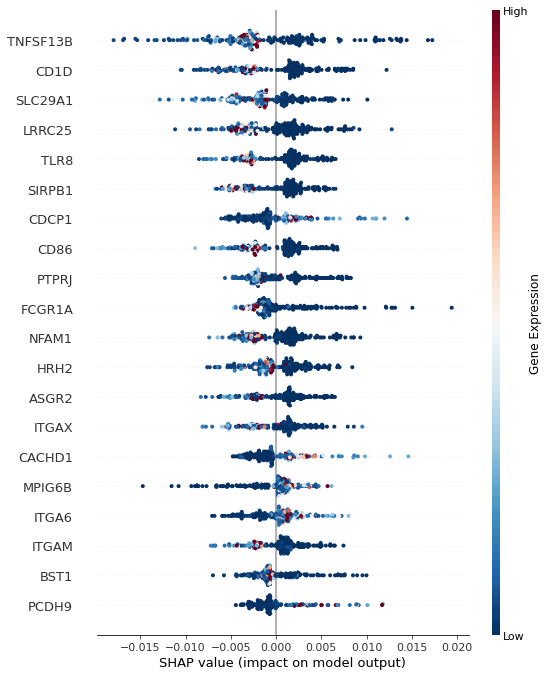

In [46]:
shap_summary_plot(adata=adata,
                  shap_values=shap_data,
                 lineage='HSC_MPP')

### Dependency Plot of New Marker and Reference Marker

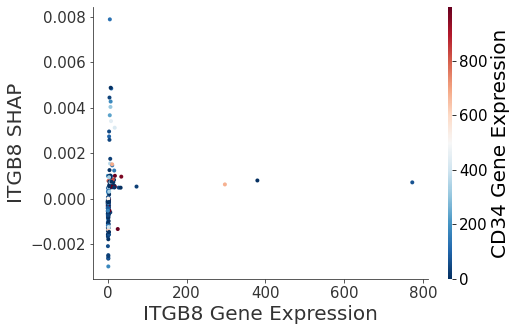

In [49]:
shap_dependency_plot(adata=adata, 
                     shap_values=shap_data, 
                     lineage='HSC_MPP', 
                     marker='ITGB8', 
                     reference='CD34')

# Analysis: Jenks One-Dimensional Clustering of SHAP 

In [54]:
shap_summary, top_shap_marker_df = jenks_shap(adata=adata, shap_values=shap_data, lineage='Lineage')

# Analysis: Generation of Metrics from each Approach

### Metrics for HSC-MPP Cell State

In [94]:
hscmpp_output_data = output_data(lineage='HSC_MPP',
            lfc_data = lfc_data,
auc_data = auc_data,
shap_data = shap_summary)

In [96]:
hscmpp_output_data

,Mean Expression,Log2 Fold Change,Log2 Fold Change Standard Error,P-Value,Adjusted P-Value,Wilcoxon Score,AUC,SHAP,GMean(LFC_AUC_-log10(Padj))
TFPI,109.038909,1.728147,0.415709,7.932671e-06,1.012941e-04,3.995043,0.745699,0.001850,1.873217
LAG3,1.778949,2.640461,0.748158,2.407648e-04,1.736427e-03,2.476893,0.652332,0.000115,1.840300
TNFRSF4,5.457489,2.058876,0.616314,1.738019e-04,1.333455e-03,2.714473,0.666943,0.000576,1.728357
NPR3,91.126319,1.606214,0.535804,6.982954e-04,4.103258e-03,4.318556,0.765596,0.001245,1.571490
ABCB1,9.401515,1.756349,0.614411,9.811235e-04,5.170365e-03,3.444061,0.711813,0.000506,1.555123
...,...,...,...,...,...,...,...,...,...
LRP1,29.926613,-4.460594,0.870612,1.451586e-09,1.204816e-07,-2.800406,0.327772,0.001764,-2.346616
CR1,16.453396,-5.176338,0.898022,7.667192e-10,8.485026e-08,-3.619297,0.277409,0.000908,-2.356709
CD1D,15.075688,-5.597506,0.965462,6.784579e-09,3.754134e-07,-3.396882,0.291088,0.003697,-2.369845
CD163,20.386740,-6.452343,1.412897,4.088056e-07,9.694533e-06,-2.461728,0.348601,0.000513,-2.431166


# Visualization: Upset Plot of Marker Overlap using Different Approaches

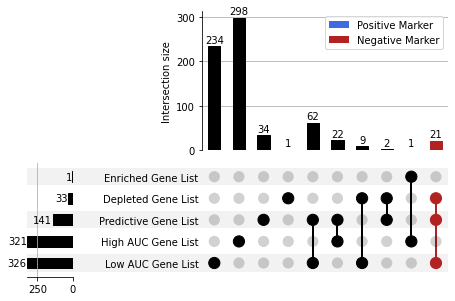

In [63]:
hscmpp_markers = upset_plot(lineage = 'HSC_MPP',
lfc_data=lfc_data, auc_data=auc_data, top_marker_df=top_shap_marker_df)

# Visualization: Correlation of Values

### Correlation of SHAP Values for 3 Select Genes

/opt/anaconda3/lib/python3.12/site-packages/isomarker/isomarker.py:216: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
/opt/anaconda3/lib/python3.12/site-packages/isomarker/isomarker.py:217: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[0], 4)


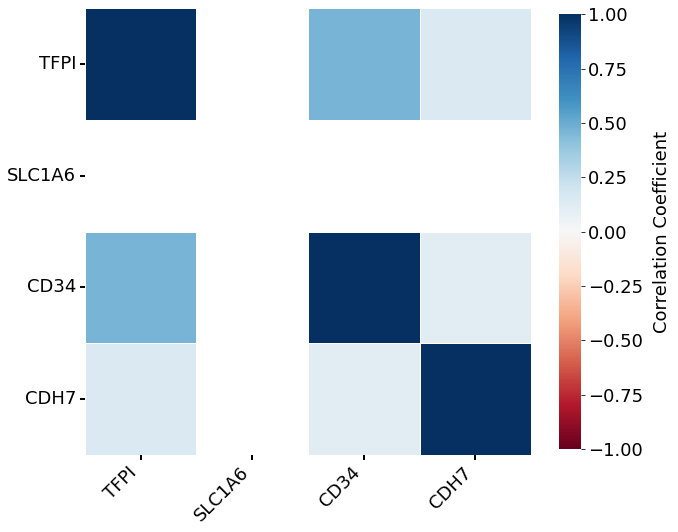

In [71]:
corr_plot(df=shap_data['HSC_MPP'], 
          gene_list=['CD34', 'CDH7', 'SLC1A6', 'TFPI'], 
          corr='pearson')

### Correlation of Gene Expression for 3 Select Genes

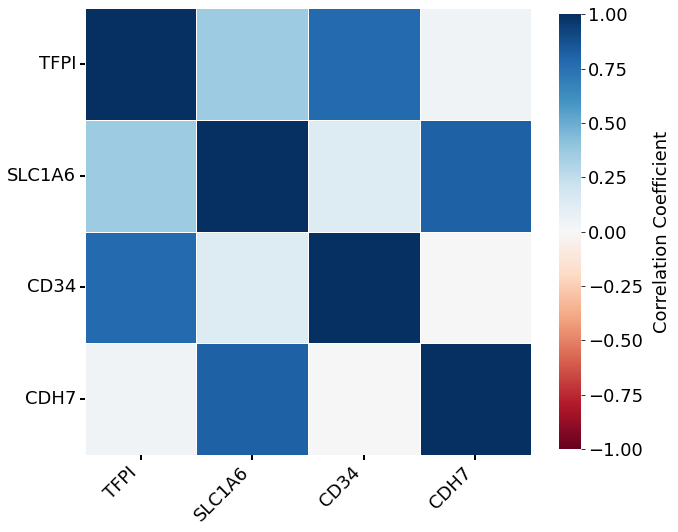

In [73]:
corr_plot(df=adata.to_df(), 
          gene_list=['CD34', 'CDH7', 'SLC1A6', 'TFPI'], 
          corr='pearson')

# Visualization: Volcano Plot of All Genes

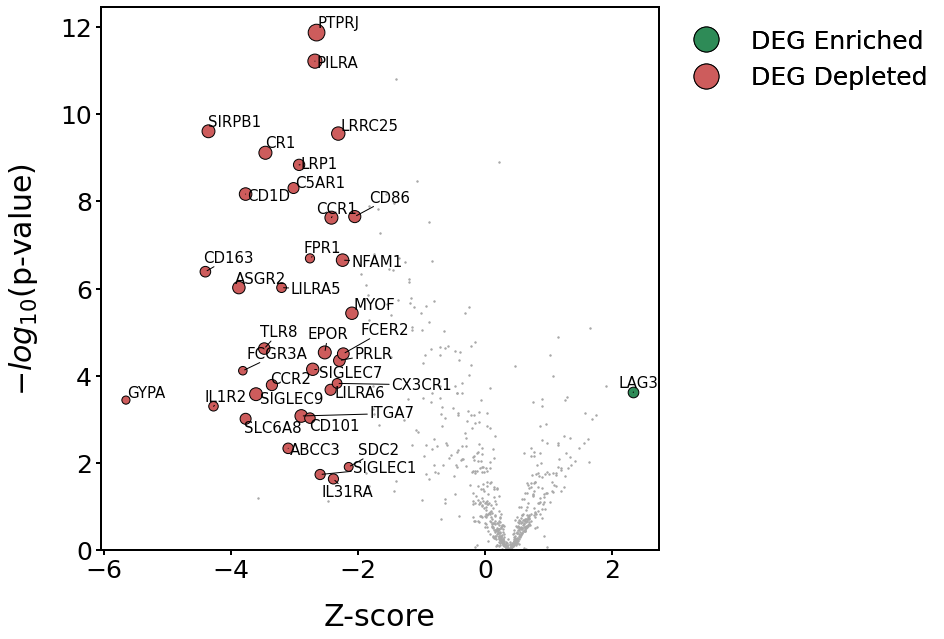

In [75]:
volcano_plot(lineage='HSC_MPP', lfc_data=lfc_data, auc_data=auc_data, shap_data=shap_summary)

# Visualization: Dotplot of SHAP Values for Select Genes 

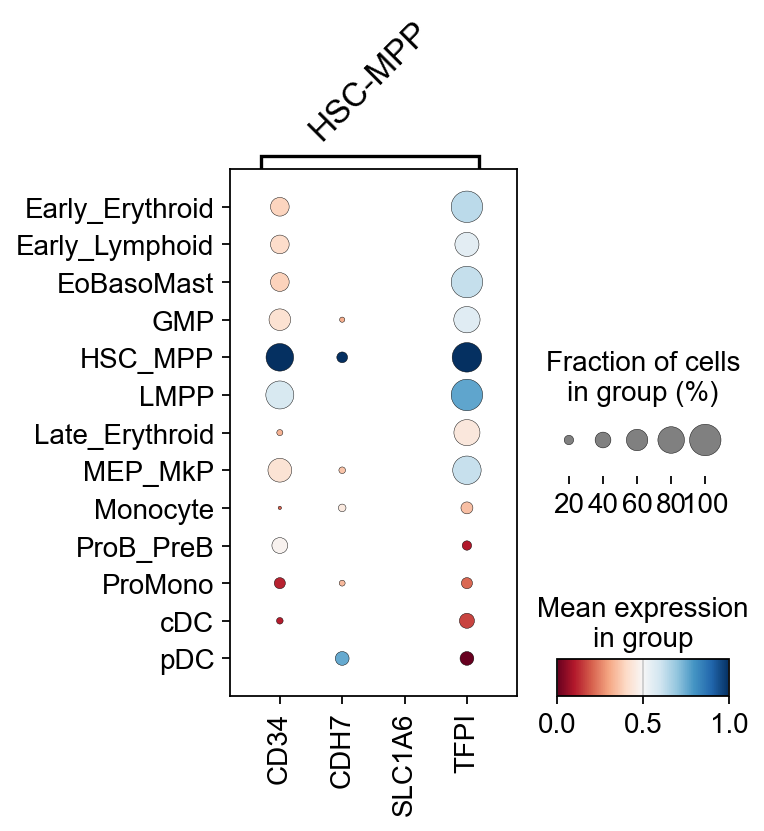

In [80]:
# Note: The "marker" argument takes both dictionaries or lists
shap_dot_plot(df=shap_data['HSC_MPP'], adata=adata, marker = {'HSC-MPP':['CD34', 'CDH7', 'SLC1A6', 'TFPI']})

# Visualization: Heatmap of LFC Values for Select Genes

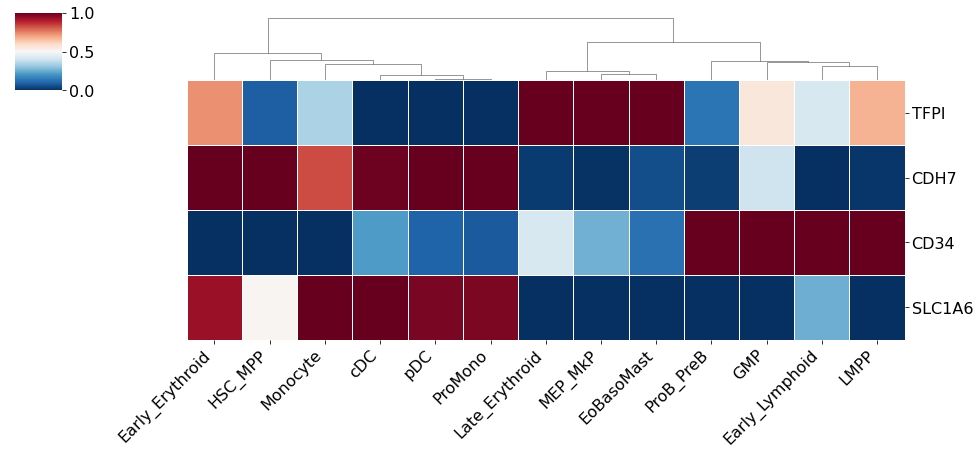

In [29]:
lfc_heatmap_plot(adata = adata,
lineage_label = 'Lineage',
df = lfc_data,
marker = ['CD34', 'CDH7', 'SLC1A6', 'TFPI'])

# Visualization: Heatmap of AUC Values for Select Genes

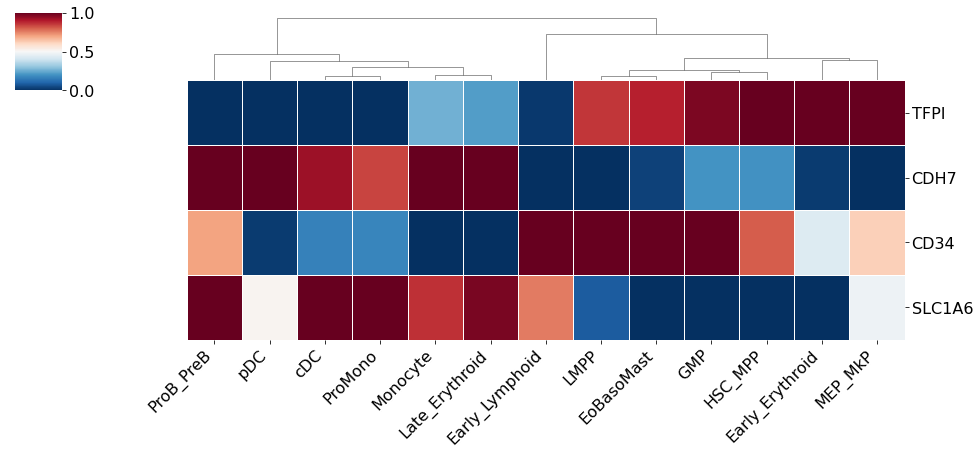

In [28]:
auc_heatmap_plot(adata = adata,
lineage_label = 'Lineage',
df = auc_data,
marker = ['CD34', 'CDH7', 'SLC1A6', 'TFPI'])

# One Line Consensus IsoMarker

In [ ]:
raw_data_file_path = 'Sample_Raw_Count.csv'
norm_data_file_path = 'Sample_VSTNorm_Count.csv'
metadata_file_path = 'Sample_Metadata.csv'
cluster_label = 'Lineage'
design_factors = ['Lineage', 'Study']
norm_layer = 'vst'
shap_model = RandomForestClassifier(random_state=0)

In [ ]:
sample_output = consensus_isomarker(raw_data_file_path, 
                                    norm_data_file_path, 
                                    metadata_file_path, 
                                    cluster_label, 
                                    design_factors, 
                                    shap_model, 
                                    norm_layer)

In [ ]:
import pickle

with open('Sample_Output.pickle', 'wb') as handle:
    pickle.dump(sample_output, handle, protocol=pickle.HIGHEST_PROTOCOL)